In [1]:
import pandas as pd
metadata_df=pd.read_json("meta_CDs_and_Vinyl.jsonl",lines=True)
reviews_df=pd.read_json("CDs_and_Vinyl.jsonl",lines=True)


In [2]:
reviews_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Five Stars,LOVE IT!,[],B002MW50JA,B002MW50JA,AGKASBHYZPGTEPO6LWZPVJWB2BVA,2016-01-13 02:06:17.000,0,True
1,5,Five Stars,LOVE!!,[],B008XNPN0S,B008XNPN0S,AGKASBHYZPGTEPO6LWZPVJWB2BVA,2016-01-13 02:06:04.000,0,True
2,3,Three Stars,Sad there is not the versions with the real/or...,[],B00IKM5N02,B00IKM5N02,AGKASBHYZPGTEPO6LWZPVJWB2BVA,2016-01-13 01:51:25.000,0,True
3,3,Disappointed,I have listen to The Broadway 1958 Flower Drum...,[],B00006JKCM,B00006JKCM,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2006-11-20 15:34:24.000,3,True
4,5,Wonderful melding,Simply great album. One of the best. Marvelous...,[],B00013YRQY,B00013YRQY,AFWHJ6O3PV4JC7PVOJH6CPULO2KQ,2020-02-19 05:29:59.946,0,False


In [3]:
reviews_df.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [4]:
#number of reviews rows
print(reviews_df.shape)

(4827273, 10)


In [5]:
# Count the number of reviews per parent_asin
review_duplicates = reviews_df["parent_asin"].value_counts()

# Get parent_asins that have more than 1 review
multiple_reviews = review_duplicates[review_duplicates > 1].index.tolist()

print(f"Products with multiple reviews: {len(multiple_reviews)}")
print(multiple_reviews[:10])  # Print sample of 10 parent_asins


Products with multiple reviews: 387714
['B016WW10SA', 'B00NEJ7MMI', 'B013JLBPGE', 'B004EBT5CU', 'B00MIA0KGY', 'B00SWBLS3C', 'B0026P3G12', 'B00MRHANNI', 'B000089RVX', 'B00KLF5J64']


In [6]:
# Count the number of metadata entries per parent_asin
metadata_duplicates = metadata_df["parent_asin"].value_counts()

# Get parent_asins that have more than 1 metadata entry
multiple_metadata = metadata_duplicates[metadata_duplicates > 1].index.tolist()

print(f"Products with multiple metadata entries: {len(multiple_metadata)}")
print(multiple_metadata[:10])  # Print sample of 10 parent_asins


Products with multiple metadata entries: 0
[]


In [7]:
# Combine both lists
problematic_parent_asins = set(multiple_reviews) | set(multiple_metadata)

print(f"Total problematic parent_asins (either case): {len(problematic_parent_asins)}")
print(list(problematic_parent_asins)[:10])  # Print sample of 10


Total problematic parent_asins (either case): 387714
['B00009N1XT', 'B00NH66T3G', 'B0078EC9D2', 'B0000YE46M', 'B002NULKYA', 'B00000IO9Y', 'B000KP63BA', 'B000000ZH5', 'B000025QYP', 'B0045OQEY8']


In [8]:


# Merge reviews with metadata based on 'parent_asin'
merged_df = reviews_df.merge(metadata_df, on="parent_asin", how="left")

# Select only the required columns
final_df = merged_df[["parent_asin", "asin", "rating", "timestamp", "text", "main_category", "price"]]

# Drop rows where any of the essential fields are missing
final_df = final_df.dropna()

# Display sample
print(final_df.head())


  parent_asin        asin  rating               timestamp  \
0  B002MW50JA  B002MW50JA       5 2016-01-13 02:06:17.000   
1  B008XNPN0S  B008XNPN0S       5 2016-01-13 02:06:04.000   
2  B00IKM5N02  B00IKM5N02       3 2016-01-13 01:51:25.000   
5  B07Z76Y18X  B07Z76Y18X       5 2019-12-11 21:36:11.173   
6  B00004NKAK  B00004NKAK       5 2018-04-26 18:41:51.415   

                                                text  main_category  price  
0                                           LOVE IT!  Digital Music  19.61  
1                                             LOVE!!  Digital Music  14.38  
2  Sad there is not the versions with the real/or...  Digital Music   7.76  
5  The sound is incredibly beautiful. If you like...  Digital Music  14.98  
6                                   beautiful music!  Digital Music   5.99  


In [9]:
print(final_df.shape)

(4324722, 7)


In [10]:

final_df.head()



,parent_asin,asin,rating,timestamp,text,main_category,price
0,B002MW50JA,B002MW50JA,5,2016-01-13 02:06:17.000,LOVE IT!,Digital Music,19.61
1,B008XNPN0S,B008XNPN0S,5,2016-01-13 02:06:04.000,LOVE!!,Digital Music,14.38
2,B00IKM5N02,B00IKM5N02,3,2016-01-13 01:51:25.000,Sad there is not the versions with the real/or...,Digital Music,7.76
5,B07Z76Y18X,B07Z76Y18X,5,2019-12-11 21:36:11.173,The sound is incredibly beautiful. If you like...,Digital Music,14.98
6,B00004NKAK,B00004NKAK,5,2018-04-26 18:41:51.415,beautiful music!,Digital Music,5.99


In [11]:
final_df["price"].value_counts()

price
7.98      109267
13.98      76587
11.98      58988
10.98      47206
9.98       42432
           ...  
294.81         1
284.02         1
194.43         1
199.55         1
196.61         1
Name: count, Length: 15287, dtype: int64

In [12]:
#drop all rows with price 0
final_df = final_df[final_df["price"] != 0] 
final_df["price"].value_counts()

price
7.98      109267
13.98      76587
11.98      58988
10.98      47206
9.98       42432
           ...  
294.81         1
284.02         1
194.43         1
199.55         1
196.61         1
Name: count, Length: 15287, dtype: int64

In [17]:
# Filter out rows where price is 0
final_df = final_df[final_df["price"] != 0]

# Count values greater than 0
greater_than_zero = final_df[final_df["price"] > 0]["price"].value_counts()

# Count values less than 0
less_than_zero = final_df[final_df["price"] < 0]["price"].value_counts()

print("Values greater than 0:")
for i in greater_than_zero.index:
    print(f"{i}: {greater_than_zero[i]}")
    
print("\nValues less than 0:")
print(less_than_zero)

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
# Import pandas if not already imported
import pandas as pd

# Identify non-numeric price values
non_numeric_prices = final_df[~final_df["price"].apply(lambda x: isinstance(x, (int, float)))]

# Or, alternatively, try to convert and check which rows fail
invalid_prices = final_df[pd.to_numeric(final_df["price"], errors="coerce").isna()]

# Show unique string values in 'price'
print("Sample of non-numeric 'price' values:")
print(invalid_prices["price"].unique()[:]) 


Sample of non-numeric 'price' values:
['from 45.00' 'from 6.10' '—' 'from 39.99' 'from 24.95' 'from 24.18'
 'from 22.00' 'from 10.83' 'from 20.00' 'from 7.30' 'from 19.98'
 'from 33.00' 'from 75.88' 'from 12.20' 'from 10.00' 'from 11.90'
 'from 54.99' 'from 4.43' 'from 53.00' 'from 29.98' 'from 9.95'
 'from 30.00' 'from 53.99' 'from 6.57' 'from 13.49' 'from 14.99'
 'from 50.00' 'from 24.98' 'from 7.97' 'from 5.79' 'from 38.00'
 'from 5.44' 'from 24.28' 'from 4.40' 'from 23.71' 'from 85.00'
 'from 8.99' 'from 7.98' 'from 6.97' 'from 45.25' 'from 8.95' 'from 14.90'
 'from 2.91' 'from 9.99' 'from 7.00' 'from 23.34' 'from 6.22' 'from 21.99'
 'from 14.04' 'from 92.98' 'from 4.98' 'from 15.97' 'from 13.82'
 'from 25.78' 'from 80.82' 'from 19.08' 'from 5.94' 'from 17.00'
 'from 27.99' 'from 18.95' 'from 44.99' 'from 37.38' 'from 5.99'
 'from 89.00' 'from 21.73' 'from 49.95' 'from 9.98' 'from 30.99'
 'from 25.44' 'from 15.99' 'from 2.19' 'from 17.98' 'from 14.98'
 'from 13.99' 'from 11.93' 'fr

In [21]:
# Strip 'from ' and convert to float where possible
final_df["price"] = final_df["price"].astype(str).str.replace("from", "", regex=False).str.strip()
final_df["price"] = pd.to_numeric(final_df["price"], errors='coerce')


In [22]:
# Filter out rows where price is 0
final_df = final_df[final_df["price"] != 0]

# Count values greater than 0
greater_than_zero = final_df[final_df["price"] > 0]["price"].value_counts()

# Count values less than 0
less_than_zero = final_df[final_df["price"] < 0]["price"].value_counts()

print("Values greater than 0:")
for i in greater_than_zero.index:
    print(f"{i}: {greater_than_zero[i]}")
    
print("\nValues less than 0:")
print(less_than_zero)

Values greater than 0:
7.98: 109270
13.98: 76587
11.98: 58988
10.98: 47206
9.98: 42433
9.99: 41722
11.99: 36308
14.98: 34626
19.99: 32997
12.98: 29573
14.99: 28889
15.98: 26142
12.99: 24214
10.99: 21156
16.98: 20626
8.98: 19531
13.99: 19512
15.99: 19274
7.0: 18504
6.98: 18367
8.99: 18173
18.98: 18133
16.99: 17878
7.99: 17109
29.99: 16945
19.98: 16470
5.99: 16387
24.99: 16246
17.99: 15968
9.0: 15864
10.97: 15769
17.98: 15728
6.99: 15482
10.0: 15167
8.0: 13286
12.0: 13164
29.98: 13053
5.0: 12656
39.99: 12537
18.99: 11032
24.98: 10556
3.99: 10240
10.72: 10141
9.95: 9867
49.99: 9538
15.0: 9505
22.99: 9423
4.99: 8958
9.96: 8875
7.97: 8870
12.95: 8462
9.97: 8131
14.95: 8043
14.0: 7982
23.99: 7962
9.68: 7317
2.99: 7025
20.0: 7007
11.0: 6962
6.97: 6812
12.97: 6685
11.95: 6605
25.0: 6573
9.49: 6565
4.98: 6552
7.25: 6335
3.0: 6167
19.95: 6137
13.0: 6041
20.98: 5824
7.09: 5811
21.98: 5762
11.97: 5748
16.0: 5562
21.99: 5469
11.9: 5322
7.28: 5290
11.88: 5266
11.89: 5230
13.95: 5180
20.99: 5165
59.9

In [23]:

# use z score to calculate outliers and count them
z_scores = (final_df["price"] - final_df["price"].mean()) / final_df["price"].std()
outliers = z_scores[abs(z_scores) > 3]
print(f"Number of outliers: {len(outliers)}")
print(outliers)



Number of outliers: 50174
40          3.297932
56          3.883502
283        32.578978
415         3.046454
466         4.721388
             ...    
4826415     4.386457
4827110     3.603556
4827137     3.604393
4827164     3.800049
4827221    33.308569
Name: price, Length: 50174, dtype: float64


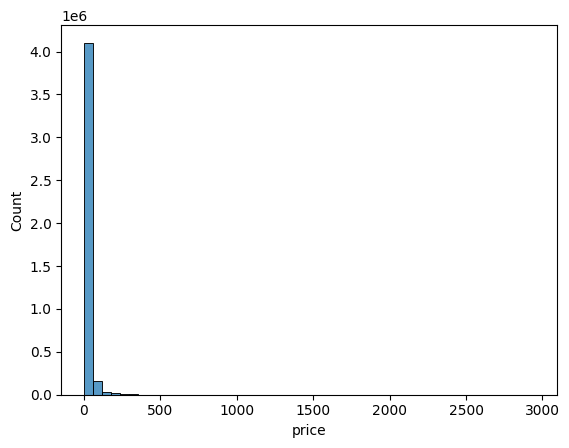

In [24]:
#use normal disturbation to show outliers for price
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_df["price"], bins=50)
plt.show()


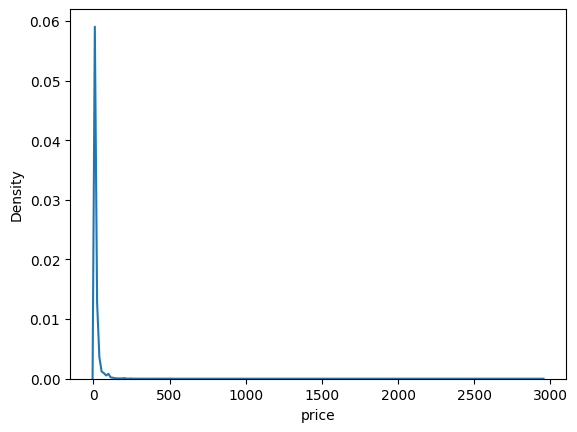

In [25]:

#use pdf to show outliers for price
sns.kdeplot(final_df["price"])
plt.show()


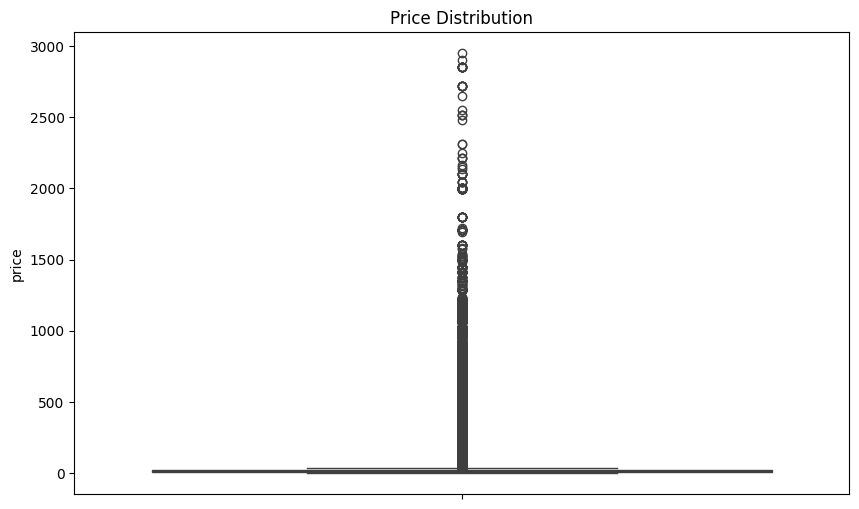

Lower bound: -6.359999999999999
Upper bound: 35.8
Number of outliers: 437186
price
39.99     12537
49.99      9538
59.99      5124
99.99      3911
79.99      3142
          ...  
122.45        1
525.00        1
101.67        1
252.74        1
196.61        1
Name: count, Length: 11652, dtype: int64


In [26]:

import matplotlib.pyplot as plt
import seaborn as sns   
#plot boxplot for price
plt.figure(figsize=(10, 6))
sns.boxplot(final_df["price"])
plt.title("Price Distribution")
plt.show()
Q1 = final_df["price"].quantile(0.25)
Q3 = final_df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
outliers = final_df[(final_df["price"] < lower_bound) | (final_df["price"] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers["price"].value_counts())



In [27]:
print(final_df.shape)

(4324722, 7)


In [ ]:
#remove outliers
#final_df = final_df[(final_df["price"] >= lower_bound) & (final_df["price"] <= upper_bound)]
#print(final_df.shape)


(474987, 7)


In [28]:
final_df["price"].value_counts()

price
7.98      109270
13.98      76587
11.98      58988
10.98      47206
9.98       42433
           ...  
529.96         1
139.88         1
284.02         1
123.55         1
196.61         1
Name: count, Length: 15182, dtype: int64

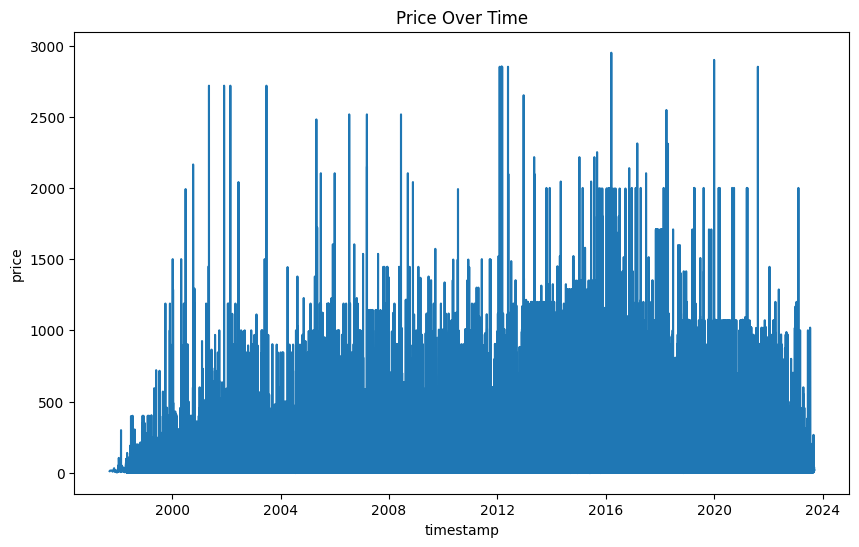

In [29]:
#price with time plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=final_df, x="timestamp", y="price")
plt.title("Price Over Time")
plt.show()



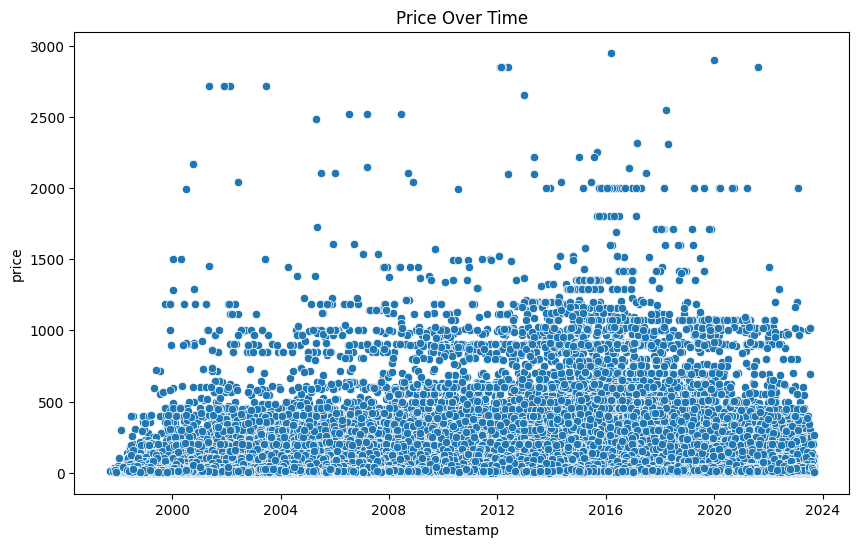

In [30]:
#price with time scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x="timestamp", y="price")
plt.title("Price Over Time")
plt.show()


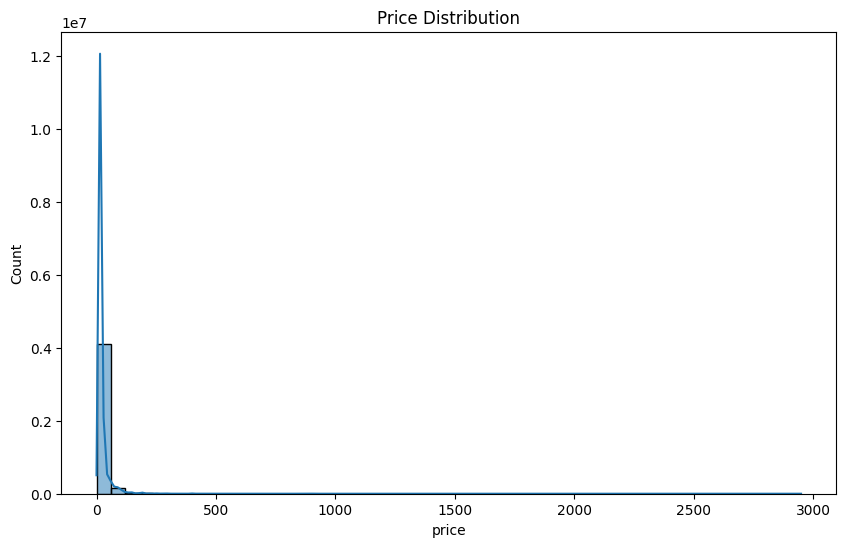

Skewness: 17.226111484488094
Kurtosis: 621.5483110006486


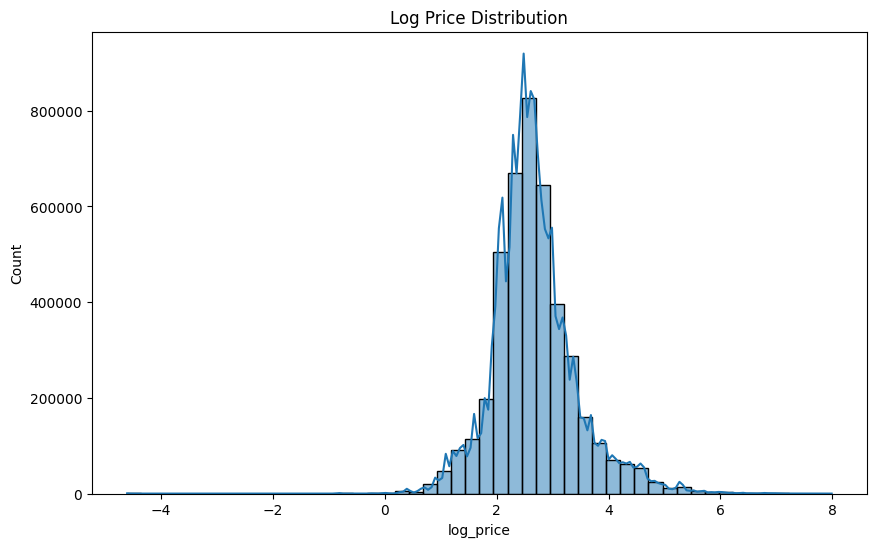

In [31]:
#skewness of price plot
import numpy as np
plt.figure(figsize=(10, 6))
sns.histplot(final_df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()
print(f"Skewness: {final_df['price'].skew()}")
print(f"Kurtosis: {final_df['price'].kurtosis()}")
#log transformation of price
final_df["log_price"] = final_df["price"].apply(lambda x: 0 if x == 0 else np.log(x))
plt.figure(figsize=(10, 6))
sns.histplot(final_df["log_price"], bins=50, kde=True)
plt.title("Log Price Distribution")
plt.show()


In [32]:

# Ensure `final_df` is defined
median_price = final_df["price"].median()
mad = (final_df["price"] - median_price).abs().median()  # Calculate MAD manually

# Identify outliers using MAD method
outliers = final_df[abs(final_df["price"] - median_price) > 3 * mad]

# Print the number of outliers
print(f"Number of outliers: {len(outliers)}")

# Print value counts of outlier prices
print(outliers["price"].value_counts())


Number of outliers: 631633
price
29.99     16945
29.98     13053
39.99     12537
49.99      9538
59.99      5124
          ...  
140.95        1
129.04        1
529.96        1
141.94        1
196.61        1
Name: count, Length: 12387, dtype: int64


In [33]:
final_df.to_csv("final_df.csv")
final_df.head()

,parent_asin,asin,rating,timestamp,text,main_category,price,log_price
0,B002MW50JA,B002MW50JA,5,2016-01-13 02:06:17.000,LOVE IT!,Digital Music,19.61,2.976040
1,B008XNPN0S,B008XNPN0S,5,2016-01-13 02:06:04.000,LOVE!!,Digital Music,14.38,2.665838
2,B00IKM5N02,B00IKM5N02,3,2016-01-13 01:51:25.000,Sad there is not the versions with the real/or...,Digital Music,7.76,2.048982
5,B07Z76Y18X,B07Z76Y18X,5,2019-12-11 21:36:11.173,The sound is incredibly beautiful. If you like...,Digital Music,14.98,2.706716
6,B00004NKAK,B00004NKAK,5,2018-04-26 18:41:51.415,beautiful music!,Digital Music,5.99,1.790091


In [34]:
final_df.shape

(4324722, 8)